# Prediction Using Supervised Machine Learning
## Submitted By - Gourav Pratap Singh

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# Reading the data to a dataframe
data = pd.read_csv('http://bit.ly/w-data')

In [4]:
# Imported data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.shape

(25, 2)

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualizing the data 

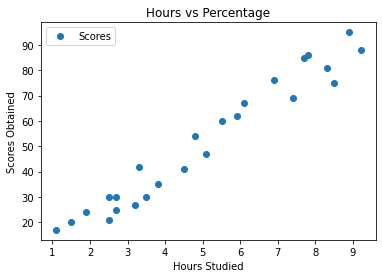

In [14]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.show()

In [15]:
# Now lets divide the data into dependent & independent variables

x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# Training the Algorithm 

In [29]:
from sklearn.linear_model import LinearRegression
# Creating an object of linear regression
lreg = LinearRegression()

In [30]:
# Fitting the model
lreg.fit(x_train,y_train)

LinearRegression()

In [26]:
print("Training is completed")

Training is completed


# Now Visualizing the LinearRegression 

### How the line will fit to the data

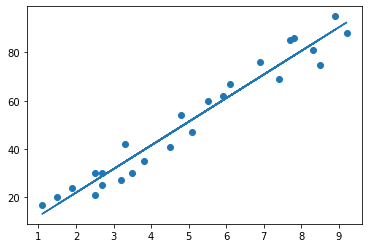

In [32]:
l = lreg.coef_*x+lreg.intercept_

# Plotting the tested data

plt.scatter(x,y)
plt.plot(x,l)
plt.show()

In [33]:
# To retrieve the intercept 

print("Intercept is :")
print(lreg.intercept_)

Intercept is :
2.370815382341867


In [35]:
# To retrieve the coefficient

print("Coefficient is :")
print(lreg.coef_)

Coefficient is :
[9.78856669]


This means for every single unit of change in studied hours, the change in score will be about 9.78%


## Lets make predictions on tested data 

In [36]:
y_pred = lreg.predict(x_test)

In [37]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

The y_pred is a numpy array that contains all the predicted valus for the input values in the x_test series

To compare the actual output values for x_test with the predicted value, executing the below script

In [38]:
# Comparing Actual v/s Predicted Values

df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


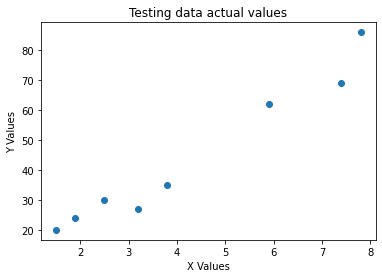

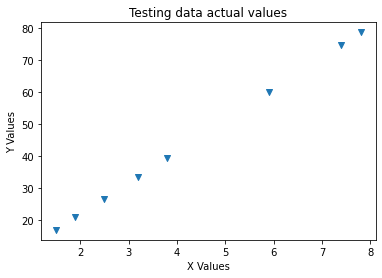

In [39]:
# Now lets visualize the predicted and actual values

plt.scatter(x_test,y_test)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Testing data actual values')
plt.show()


plt.scatter(x_test,y_pred,marker='v')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Testing data actual values')
plt.show()


# Evaluating the Algorithm

## The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a perticular dataset. For regression algorithms, three evaluation metrics are commonly used:

### 1) Mean Absolute Error
### 2) Mean Squared Error
### 3) Root Mean Squared Error


In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.4197278080276545
Mean Squared Error: 22.96509721270044
Root Mean Squared Error: 4.792191274636316


# #The Score if a student studies for 9.25 hrs/ day will be

In [45]:
hours=9.25
own_pred= lreg.predict([[hours]])
print("No. of hours = {}hrs".format(hours))
print("Marks Scored = {}".format(own_pred[0]))

No. of hours = 9.25hrs
Marks Scored = 92.91505723477056
